<a href="https://colab.research.google.com/github/Prakharava/ML-Data-Science/blob/main/NavieBayes(Gender).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/drive/MyDrive/gender_classification_v7.csv")

In [3]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
data['gender'] = data['gender'].map({'Male':1,'Female':0})

In [7]:
data.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


In [8]:
data.shape

(5001, 8)

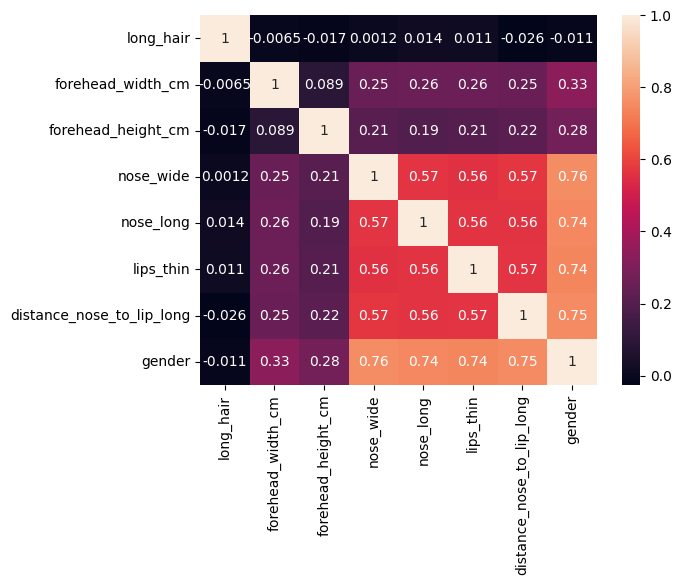

In [10]:
sns.heatmap(data.corr(), annot=True)
plt.show()

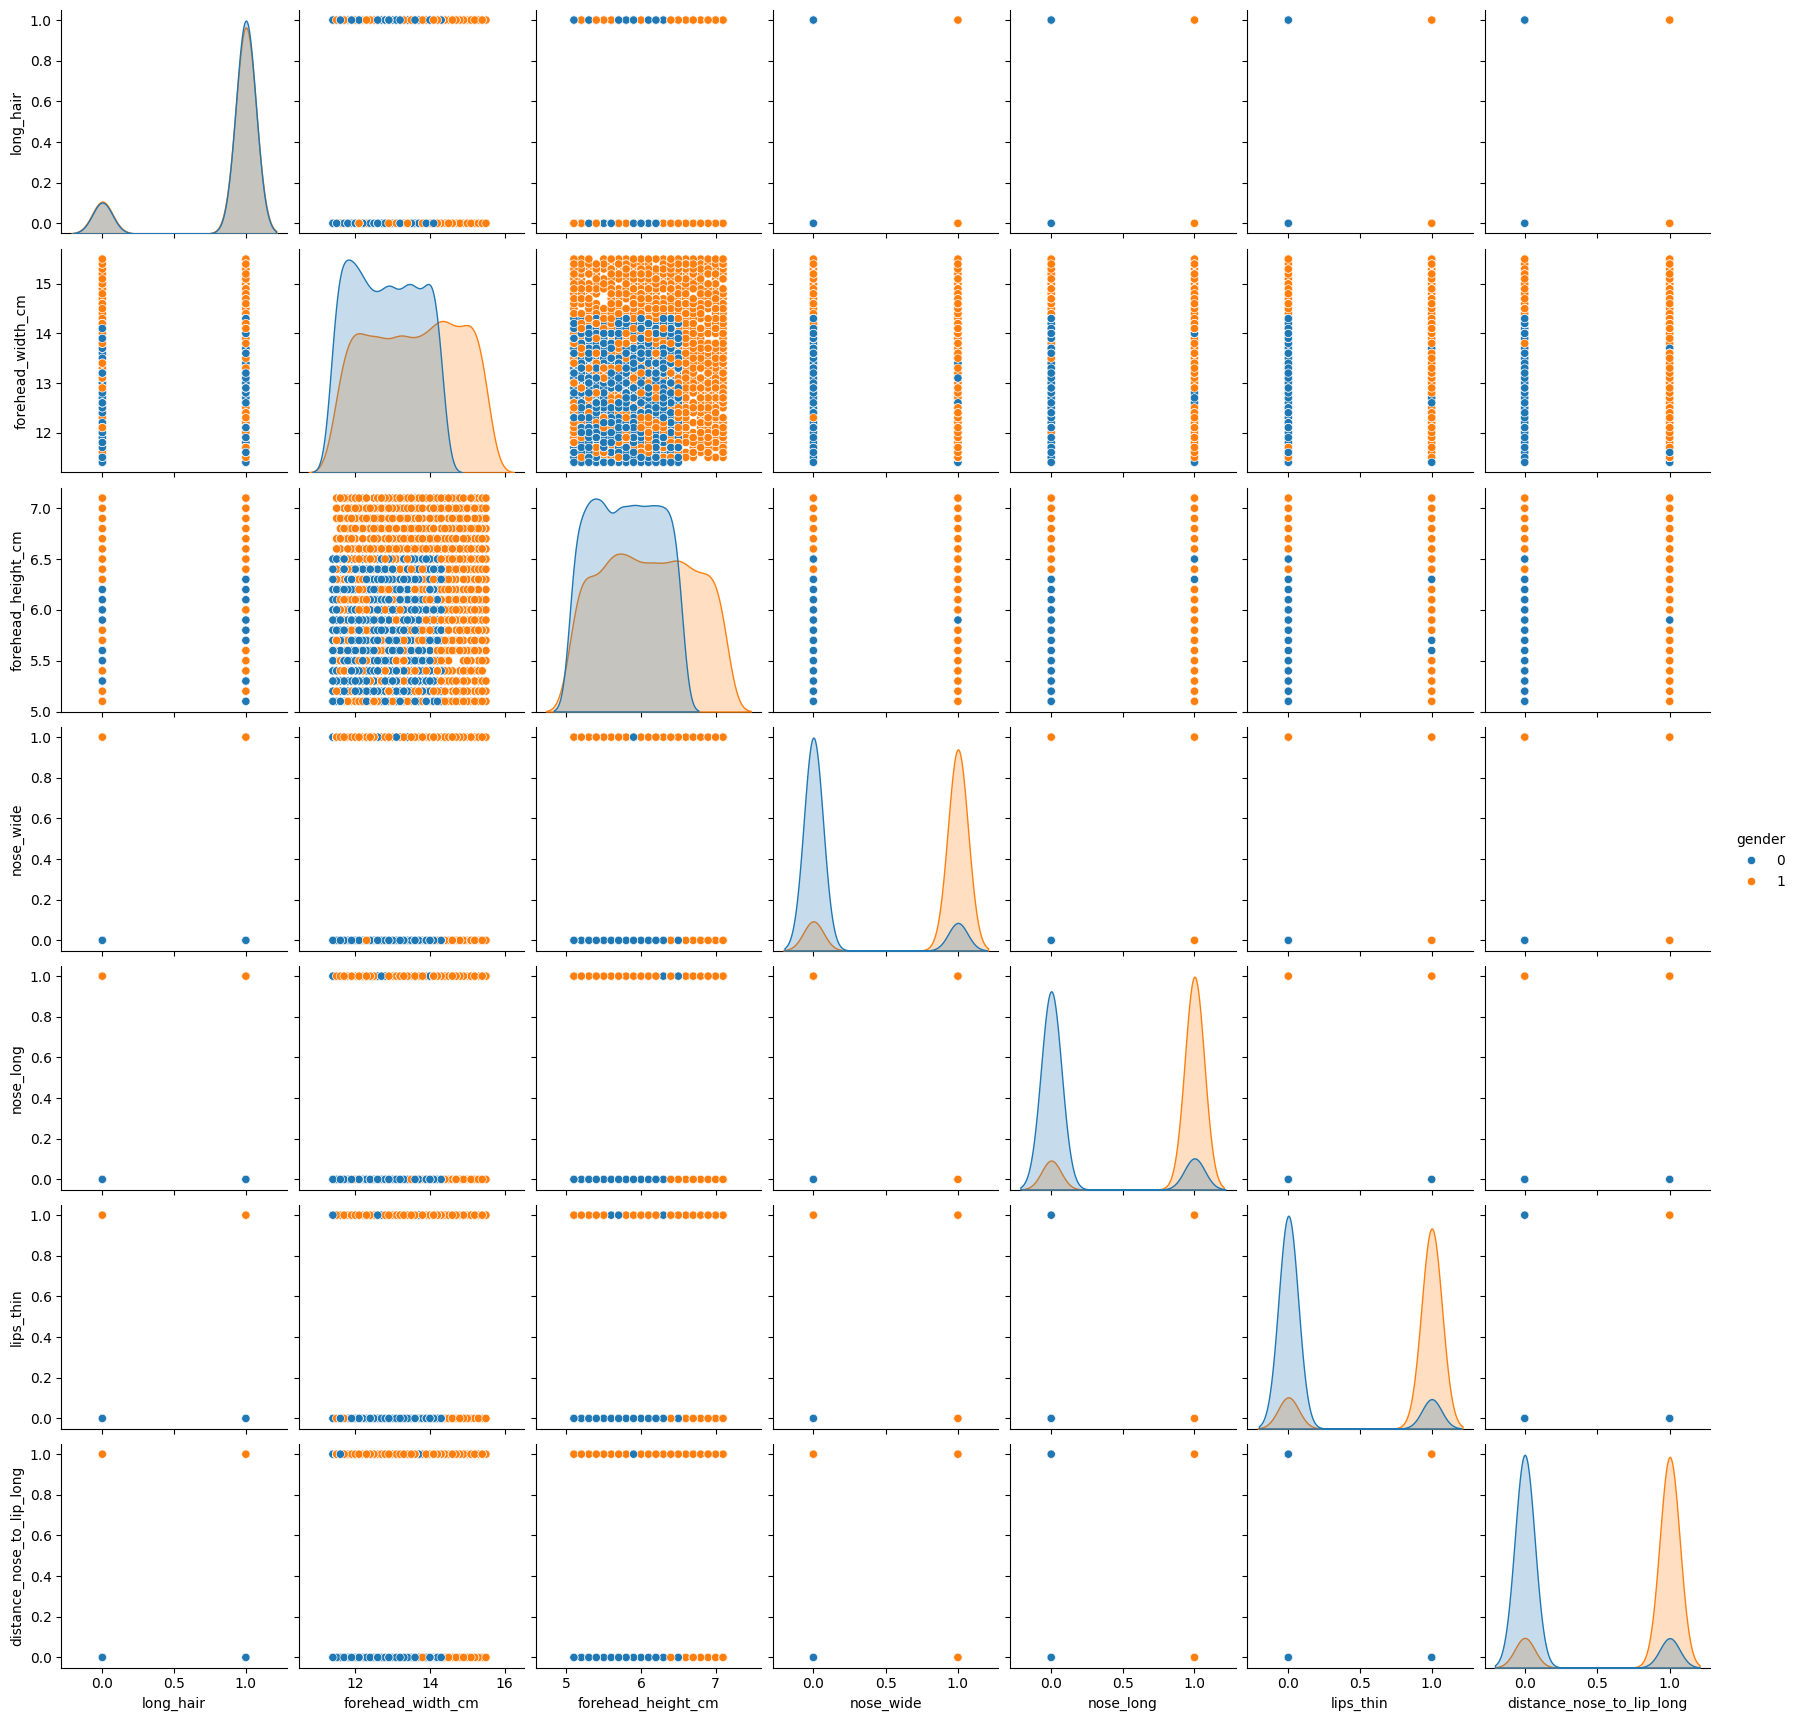

In [11]:
sns.pairplot(data, hue= "gender")
plt.show()

In [12]:
x = data.drop("gender", axis=1)
y = data["gender"]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [15]:
print("print train for accuracy of NBC algo:",model.score(x_train, y_train))
print("print test for accuracy of NBC algo:",model.score(x_test, y_test))

print train for accuracy of NBC algo: 0.97175
print test for accuracy of NBC algo: 0.964035964035964


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [17]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.964035964035964
Precision: 0.9695740365111561
Recall: 0.9579158316633266
F1 Score: 0.9637096774193549
